<a href="https://colab.research.google.com/github/illhyhl1111/AI_Expert_2021/blob/main/Lab6_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import DataLoader, Dataset

import torchvision
from torchvision import datasets
from torchvision import transforms

from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import PIL

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Training dataset 직접 만들기

1. Download dataset from https://github.com/illhyhl1111/AI_Expert_2021/blob/main/toy_dataset.zip
2. Load dataset as trainset
3. Transform image (hint: https://pytorch.org/vision/stable/transforms.html)
  * Change image to Tensor
  * Randomly crop image with size 800 by 800
  * Resize image to 224 by 224
  * Randomly rotate image in range [-90, 90] 
  * Change image to grayscale with 3 channels 
  

In [ ]:
transform = # TODO

trainset = # TODO

tensor([1, 0, 0, 1])


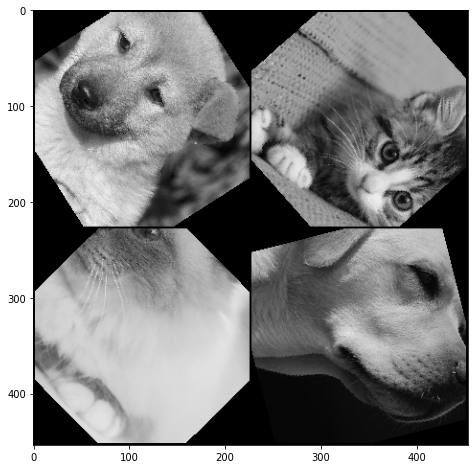

In [ ]:
args = {
    'num_workers' : 1,
    'batch_size' : 4,
    'shuffle' : True,
}

train_loader = DataLoader(trainset,**args)

img, label = next(iter(train_loader))
plt.figure(figsize = (8,8))
plt.imshow(torchvision.utils.make_grid(img, nrow=2).permute(1, 2, 0))
print(label)

### Pretrained model 로딩 및 활용하기

In [ ]:
alexnet = torchvision.models.alexnet(pretrained=True)
out = alexnet(img)
print(out.shape)

In [ ]:
class SuperSimpleClassifier(nn.Module):
  def __init__(self,func=None):
    super(SuperSimpleClassifier, self).__init__()
    # TODO - pretrained Alexnet을 초기화, Alexnet의 출력을 입력으로 받아 출력의 shpae이 2인 linear layer를 초기화
  
  def forward(self, x):
    # TODO - 이미지 입력 x를 받아 각 label에 대응되는 확률을 출력하는 함수 구현, 단 detach() 함수를 통해 gradient를 Alexnet까지 전달하지 않을 것

transform =                                       # TODO - 이미지를 텐서로 변환하고, 800 x 800의 크기로 random crop한 뒤 224 x 224의 크기로 resize하는 transform 구현
trainset =                                        # TODO - toy_dataset을 위 transform으로 변환해주는 데이터셋 구현
train_loader = DataLoader(trainset,**args)

model = SuperSimpleClassifier()
loss_fn = nn.CrossEntropyLoss()
optimizer =                                       # TODO - Adam optimizer 초기화, 단 Alexnet은 학습시키지 않을 것

In [ ]:
def compute_acc(argmax,y):
    count = 0
    for i in range(len(argmax)):
        if argmax[i]==y[i]:
            count+=1
    return count / len(argmax)

In [ ]:
for epoch in range(20):    
    for x,y in train_loader:
        # TODO - 학습 코드 구현하기, 모델의 출력의 변수명은 y_ 으로, 손실 함수의 출력값의 변수명은 loss 으로
        
    print("Epoch {}, Loss(train) : {}".format(epoch+1,loss.item()))
    if epoch % 2 == 1:
        _, argmax = torch.max(y_,dim=-1)
        test_acc = compute_acc(argmax,y.numpy())
        
        print("Acc(val) : {}".format(test_acc))